# The case study: "No maximum at the R2-curve"
## Author 
 Olga Krasotkina for MPI

## Problem statement
In some cases the PR2 curve is monotonic and has not any extremum and sugessts very large  optimal smoothness tending to the full stationary betas. 

## Source data

There are 12 indicies an 158 funds for 60 time points from 2015-03-29 till 2015-06-12. 


## Research steps

* Done Python workspace for non-stationaty regression and cross-validation analysis. At this stage I use the non-stationaty regression estimation procedure without any constraints and **leave-one-out** algorithm as cross-validation. I would like to make research step-by-step from basic to complicated model
* 

## Conclusion

There are two problem in this data.

* The return of  I2 index at the 2015-03-25 is oulier.
* **"Zero-return"** problem. The presence of $0$ in the data tend to the ambiguity of the betas choice.  In this data where are a lot of zeros for the cash-like asset. 

## Extended studies
### Step 1. Import packages 

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import matplotlib.pylab as plt
from datetime import datetime

In [2]:
%matplotlib notebook

/Users/krasotkina/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
fund_data = pd.read_excel('SmoothnessData.xlsx','Sheet1')
assets_data = pd.read_excel('SmoothnessData.xlsx','Sheet2')
#fund_data

In [12]:
funds = fund_data.iloc[2:62,0:158].values
assets = assets_data.iloc[2:62,0:12].values
dates = assets_data.iloc[2:62].index.tolist()
print dates[1].date
#dates

In [10]:
n = np.size(assets,1)
T = np.size(assets,0)
print(n)
print(T)

12
60



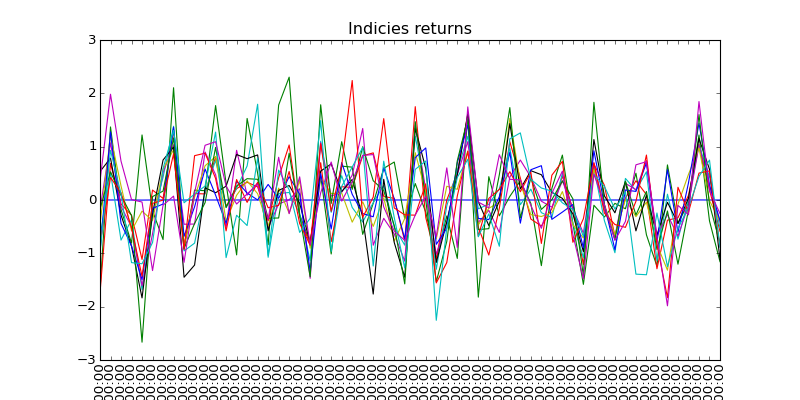

In [11]:
assets = np.mat(assets)
funds = np.mat(funds)
time =  range(T)
plt.figure(1, figsize=(10,5)) 
plt.title('Indicies returns')
plt.xticks(time, dates, rotation=90)

#plt.subplot(3,1,1)
for i in range(0,n):
    plt.plot(time, assets[:,i])
plt.show()


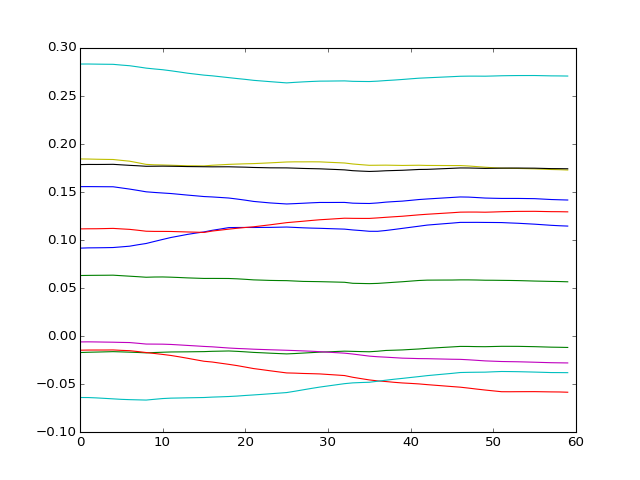

In [21]:
lam = 400

assets = np.mat(assets)
funds = np.mat(funds)
fund = funds[:,0]
outPoint = np.zeros([T,1])
beta = nsr.nonstatRegress(assets, fund, lam, outPoint)


time =  range(T)
plt.figure(2) 
#plt.subplot(3,1,2)
for i in range(1,n):
    plt.plot(time, beta[:,i])

plt.show()


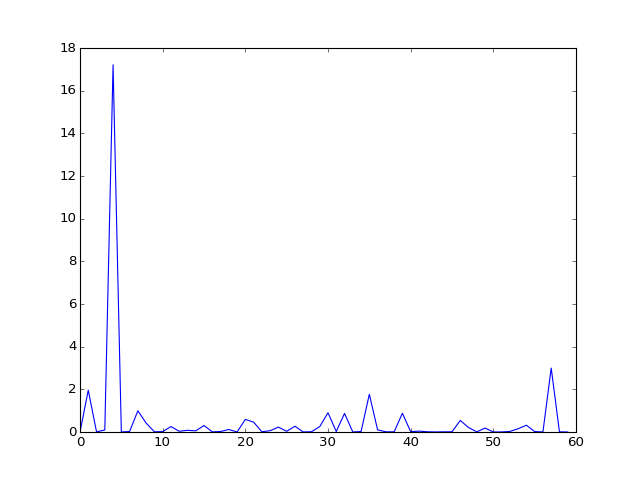

In [18]:
lam = 100

fund = funds[:,2]
arrR2, r2 = nsr.LeaveOneOut(assets,fund,lam)
plt.figure(3) 
#plt.subplot(3,1,3)
plt.plot(time, arrR2)
plt.show()

In [19]:
print r2

0.544710163579



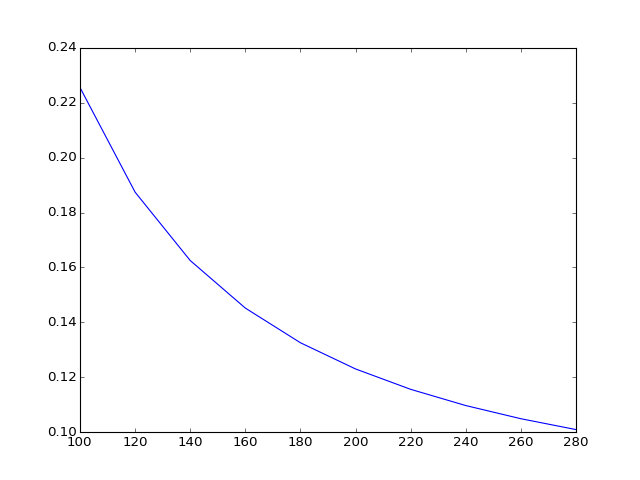

In [20]:
assets = np.mat(assets)
funds = np.mat(funds)
fund = funds[:,1]
lam_arr = np.arange(100,300,20)
r2_lam_arr = []
arr = []
for lam in lam_arr:
     arr, r2_lam = nsr.LeaveOneOut(assets,fund,lam)
     r2_lam_arr.append(r2_lam)
#print  r2_lam_arr   
plt.figure(4)
plt.plot(lam_arr,r2_lam_arr)
#plt.show()